In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def runningMeanFast(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]

In [48]:
n = 500

In [49]:
curve1 = np.loadtxt('testModel-10June.csv',delimiter=',')
curve2 = np.loadtxt('testModel-10June2.csv',delimiter=',')
curve3 = np.loadtxt('testModel-10June3.csv',delimiter=',')
curve4 = np.loadtxt('testModel-10June4.csv',delimiter=',')

In [50]:
curve5 = np.loadtxt('testModel-10June5.csv',delimiter=',')

In [51]:
curve6 = np.loadtxt('testModel-10June6.csv',delimiter=',')

In [52]:
c1 = runningMeanFast(curve1[:,1],n)
c2 = runningMeanFast(curve2[:,1],n)
c3 = runningMeanFast(curve3[:,1],n)
c4 = runningMeanFast(curve4[:,1],n)
c5 = runningMeanFast(curve5[:,1],n)
c6 = runningMeanFast(curve6[:,1],n)

(0.15, 0.5)

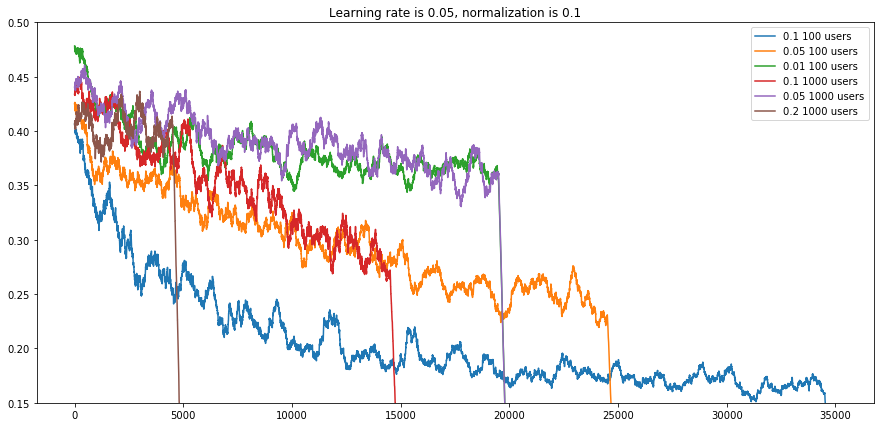

In [56]:
plt.figure(figsize=[15,7])

plt.plot(c2)
plt.plot(c1)
plt.plot(c3)
plt.plot(c4)
plt.plot(c5)
plt.plot(c6)

plt.title('Learning rate is 0.05, normalization is 0.1')
plt.legend(['0.1 100 users','0.05 100 users','0.01 100 users' ,'0.1 1000 users','0.05 1000 users', '0.2 1000 users'])
plt.ylim([0.15, 0.5])

На рисунке выше показана зависимость переменной delta от количества итераций при трёх различных значениях скорости обучения, размер модели по пользователям равен 100. Как видно, модель вполне устойчива и быстро обучается при скорости 0.1. При попытке выставить скорость обучения 0.2 модель становится нестабильной и вызывает ошибки переполнения.
Таким образом, скорость в 0.1 является оптимальной. Теперь требуется понять, зависит ли оптимальная скорость от размеров модели. Для этого запустил аналогичную процедуру обучения, но уже для модели с размером в 1000 пользователей.
Также из этого можно определить с каким фактором должна убывать скорость обучения.

In [81]:
l_001_100 = np.loadtxt('learning_log_0.01_100.csv',delimiter=',')
l_001_1000 = np.loadtxt('learning_log_0.01_1000.csv',delimiter=',')

In [78]:
l_001_10000 = np.loadtxt('learning_log_0.01_10000.csv',delimiter=',')

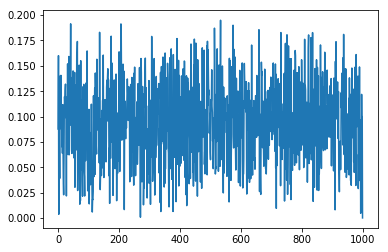

In [85]:
l_001_100 = np.loadtxt('learning_log_0.01_100.csv',delimiter=',')
plt.plot(runningMeanFast(l_001_100,1))
#plt.plot(runningMeanFast(l_001_1000,5))
#plt.plot(runningMeanFast(l_001_10000,5))

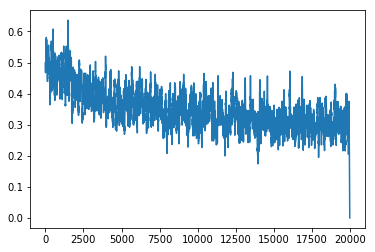

In [96]:
l_001_100 = np.loadtxt('learning_log_0.1_1000.csv',delimiter=',')
plt.plot(runningMeanFast(l_001_100,50))

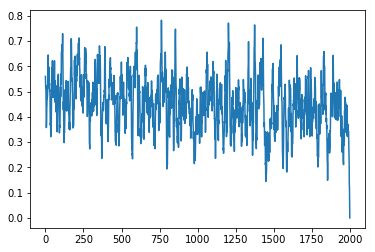

In [98]:
l_001_100 = np.loadtxt('learning_log_0.1_100.csv',delimiter=',')
plt.plot(runningMeanFast(l_001_100,10))

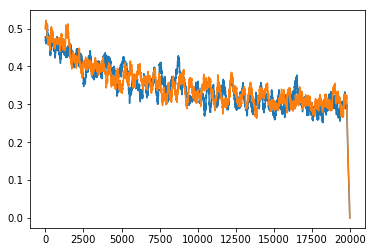

In [103]:
l_001_100 = np.loadtxt('learning_log_0.1_1000.csv',delimiter=',')
l_001_100_n = np.loadtxt('learning_log_0.1_1000-nice.csv',delimiter=',')

plt.plot(runningMeanFast(l_001_100,200))
plt.plot(runningMeanFast(l_001_100_n,200))

In [111]:
l_001_100_dg_m2 = np.loadtxt('learning_log_0.1_1000.csv',delimiter=',')

In [113]:
l_001_100_dg_m3 = np.loadtxt('learning_log_0.1_1000.csv',delimiter=',')

In [117]:
l_001_100_dg_m4 = np.loadtxt('learning_log_0.1_1000.csv',delimiter=',')

In [119]:
l_001_100_dg_static = np.loadtxt('learning_log_0.1_1000.csv',delimiter=',')

In [121]:
l_001_100_dg_m5 = np.loadtxt('learning_log_0.1_1000.csv',delimiter=',')

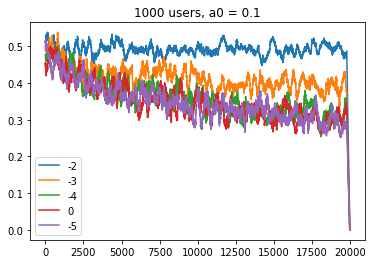

In [123]:
plt.plot(runningMeanFast(l_001_100_dg_m2,200))
plt.plot(runningMeanFast(l_001_100_dg_m3,200))
plt.plot(runningMeanFast(l_001_100_dg_m4,200))
plt.plot(runningMeanFast(l_001_100_dg_static,200))
plt.plot(runningMeanFast(l_001_100_dg_m5,200))
plt.legend(['-2','-3','-4','0','-5'])
plt.title('1000 users, a0 = 0.1')

In [124]:
l_01_1000_dg_m5 = np.loadtxt('learning_log_0.1_10000.csv',delimiter=',')

In [127]:
l_01_1000_dg_m3 = np.loadtxt('learning_log_0.1_10000.csv',delimiter=',')

In [130]:
l_01_1000_dg_m7 = np.loadtxt('learning_log_0.1_10000.csv',delimiter=',')

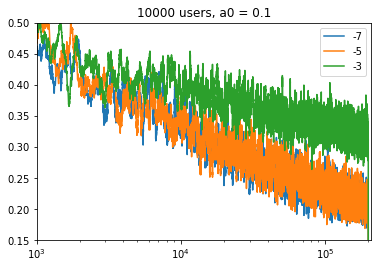

In [153]:
plt.semilogx(runningMeanFast(l_01_1000_dg_m7,200))
plt.semilogx(runningMeanFast(l_01_1000_dg_m5,200))
plt.semilogx(runningMeanFast(l_01_1000_dg_m3,200))

plt.xlim([1e3,2.1e5])
plt.ylim([0.15, 0.5])
plt.legend(['-7','-5','-3'])
plt.title('10000 users, a0 = 0.1')

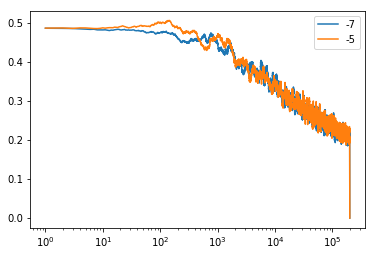

In [141]:
plt.semilogx(runningMeanFast(l_01_1000_dg_m7,500))
plt.semilogx(runningMeanFast(l_01_1000_dg_m5,500))
plt.legend(['-7','-5'])
#plt.ylim([0.15, 0.5])